<a href="https://colab.research.google.com/github/denden26/My-Python-Project/blob/main/Customer_Churn_Rate_and_Prediction_Bank_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn Rate (Project)**

Customer Churn Rate merupakan analisis untuk mengetahui apakah customer akan tetap menjadi customer atau malah tidak menjadi customer lagi pada waktu tertentu. Pada project kali ini menganalisis dan memprediksi customer churn rate pada suatu Bank.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bank_cstmr = pd.read_csv('/content/Churn_Modelling.csv')
bank_cstmr.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis (EDA)

In [ ]:
bank_cstmr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Menghilangkan features yang tidak perlu digunakan dalam model**

In [ ]:
bank_cstmr.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
bank_cstmr.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Eksplorasi Categorical Features**

In [ ]:
#Mengubah variabel dibawah dengan menjadi category
cat_features = ['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']
for colname in cat_features:
  bank_cstmr[colname] = bank_cstmr[colname].astype('category')

In [ ]:
bank_cstmr[cat_features].nunique()

Geography          3
Gender             2
Tenure            11
NumOfProducts      4
HasCrCard          2
IsActiveMember     2
Exited             2
dtype: int64

Varibel Geography ada 3 kategori, Gender 2 kategori, dan seterusnya

**Membuat bar chart**

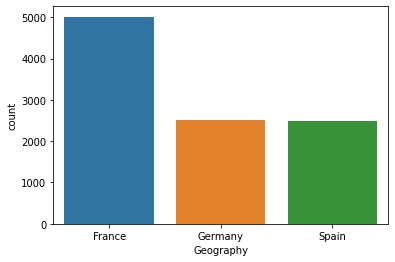

In [ ]:
sns.countplot(data=bank_cstmr, x='Geography')

Berdasarkan negaranya bank memiliki customers paling banyak dari negara France

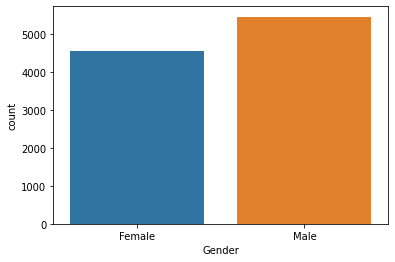

In [ ]:
sns.countplot(data=bank_cstmr, x='Gender')

Berdasarkan jenis kelaminnya bank memiliki customers paling banyak dari jenis kelamin laki-laki (male)

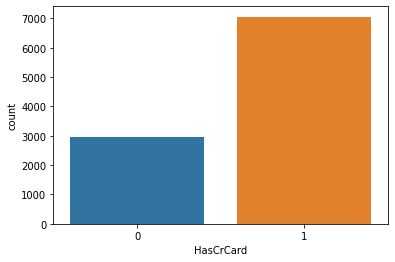

In [ ]:
sns.countplot(data=bank_cstmr, x='HasCrCard')

Berdasarkan HasCrCard bank memiliki customers paling banyak dari kategori 1

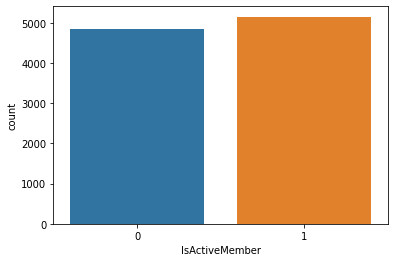

In [ ]:
sns.countplot(data=bank_cstmr, x='IsActiveMember')

Berdasarkan Member yang aktif bank memiliki customers aktif paling banyak namun beda tipis dengan yang tidak aktif

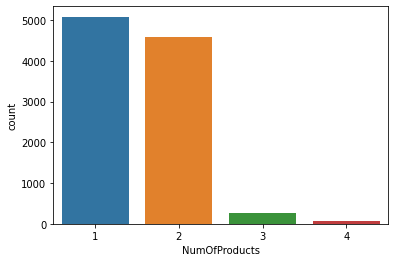

In [ ]:
sns.countplot(data=bank_cstmr, x='NumOfProducts')

Berdasarkan NumOfProductsnya bank memiliki customers paling banyak dari kategori 1

Berdasarkan Tenure nya bank memiliki customers paling banyak dari kategori 2

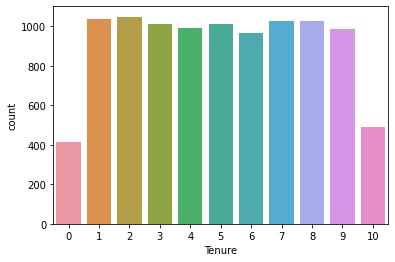

In [ ]:
sns.countplot(data=bank_cstmr, x='Tenure')

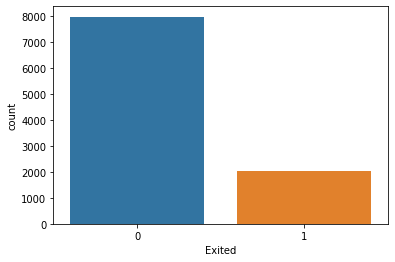

In [ ]:
sns.countplot(data=bank_cstmr, x='Exited')

Jika nilai 0 adalah customer tidak exited maka paling banyak customer tidak melakukan exited

**Melihat nilai rata-rata dari masing-masing variabel bersarkan negara**

In [ ]:
bank_cstmr.groupby('Geography').mean()

,CreditScore,Age,Balance,EstimatedSalary
Geography,,,,
France,649.668329,38.511767,62092.636516,99899.180814
Germany,651.453567,39.771622,119730.116134,101113.435102
Spain,651.333872,38.890997,61818.147763,99440.572281


**Melihat nilai rata-rata dari masing-masing variabel bersarkan gender**

In [ ]:
bank_cstmr.groupby('Gender').mean()

,CreditScore,Age,Balance,EstimatedSalary
Gender,,,,
Female,650.831389,39.238389,75659.369139,100601.541382
Male,650.276892,38.658237,77173.974506,99664.576931


**Melihat nilai rata-rata dari masing-masing variabel bersarkan HasCrCard**

In [ ]:
bank_cstmr.groupby('HasCrCard').mean()

,CreditScore,Age,Balance,EstimatedSalary
HasCrCard,,,,
0,651.345331,39.112054,77920.787552,100974.397711
1,650.187952,38.842381,75886.913330,99721.161949


**Melihat nilai rata-rata dari masing-masing variabel bersarkan Aktif Member**

In [ ]:
bank_cstmr.groupby('IsActiveMember').mean()

,CreditScore,Age,Balance,EstimatedSalary
IsActiveMember,,,,
0,647.973603,37.997938,77134.376863,100767.203854
1,652.934188,39.791497,75875.422145,99452.965894


**Melihat nilai rata-rata dari masing-masing variabel bersarkan NumOfProducts**

In [ ]:
bank_cstmr.groupby('NumOfProducts').mean()

,CreditScore,Age,Balance,EstimatedSalary
NumOfProducts,,,,
1,649.120968,39.673092,98551.870614,99487.256851
2,652.188671,37.753595,51879.145813,100452.012821
3,648.105263,43.195489,75458.328195,104318.130564
4,653.583333,45.683333,93733.135000,104763.723333


**Melihat nilai rata-rata dari masing-masing variabel bersarkan Tenure**

In [ ]:
bank_cstmr.groupby('Tenure').mean()

,CreditScore,Age,Balance,EstimatedSalary
Tenure,,,,
0,652.043584,39.186441,79878.910630,102374.579128
1,648.806763,39.428986,78555.384222,100468.618957
2,652.832061,39.058206,76839.626469,98312.359857
3,650.530228,39.028741,77668.059881,97667.196283
4,651.502528,38.239636,74059.394065,99867.777826
5,650.527668,39.287549,76444.280860,101286.009644
6,647.380558,38.862461,74403.942637,99168.733154
7,649.606031,38.367704,75551.634426,101257.240370
8,647.749268,38.450732,77936.598254,101072.102937


**Melihat nilai rata-rata dari masing-masing variabel bersarkan Customer Exited**

In [ ]:
bank_cstmr.groupby('Exited').mean()

,CreditScore,Age,Balance,EstimatedSalary
Exited,,,,
0,651.853196,37.408389,72745.296779,99738.391772
1,645.351497,44.837997,91108.539337,101465.677531


**Membuat diagram customer yang melakukan exited berdasarkan variabelnya**

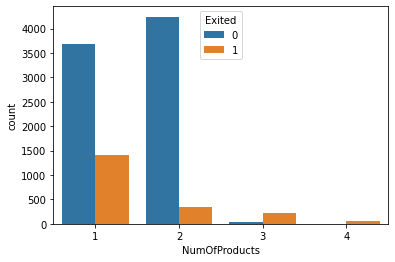

In [ ]:
sns.countplot(data=bank_cstmr, x='NumOfProducts', hue='Exited')

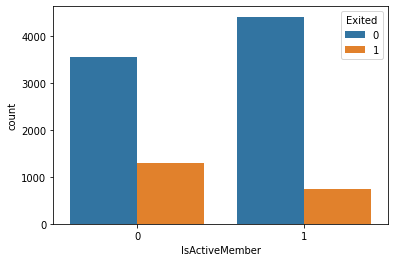

In [ ]:
sns.countplot(data=bank_cstmr, x='IsActiveMember', hue='Exited')

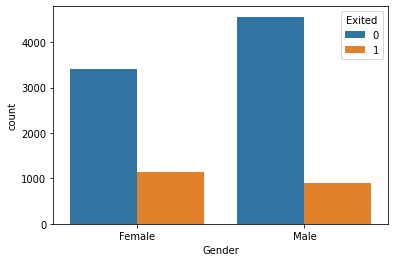

In [ ]:
sns.countplot(data=bank_cstmr, x='Gender', hue='Exited')

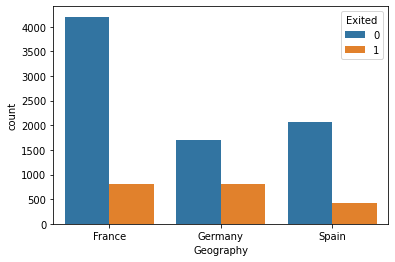

In [ ]:
sns.countplot(data=bank_cstmr, x='Geography', hue='Exited')

**Membuat boxplot pada masing-masing variabel**

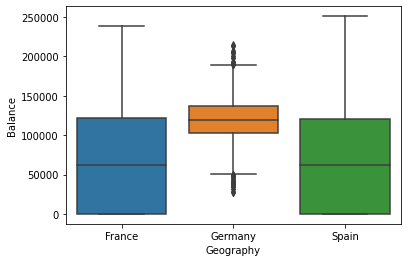

In [ ]:
sns.boxplot(x=bank_cstmr['Geography'], y=bank_cstmr['Balance'])

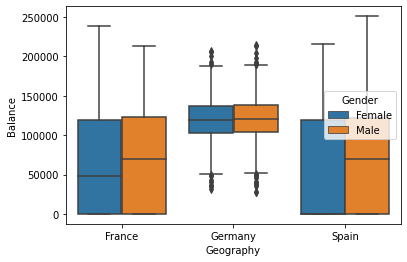

In [ ]:
sns.boxplot(x=bank_cstmr['Geography'], y=bank_cstmr['Balance'], hue=bank_cstmr['Gender'])

**Hasil temuan**

1. Berdasarkan negara dan balance, negara yang memiliki nilai balance paling besar German dengan nilai median dan nilai maksimum paling tinggi
2. Dari negara German tersebut laki-laki yang memiliki nilai median paling besar namun beda tipis dengan yg perempuan

**Numerical Features**

In [ ]:
bank_cstmr.columns
num_features = ['CreditScore','Age','Balance','EstimatedSalary']

In [ ]:
bank_cstmr[num_features].nunique()

CreditScore         460
Age                  70
Balance            6382
EstimatedSalary    9999
dtype: int64

**Membuat Histogram pada num_features**

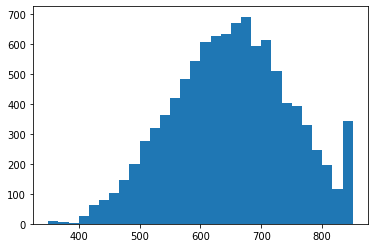

In [ ]:
bank_cstmr['CreditScore'].hist(bins=30, grid=False)

**Melihat jumlah maksimal yang exited berdasarkan kredit score**

In [ ]:
bank_cstmr[bank_cstmr['CreditScore'] == bank_cstmr['CreditScore'].max()]['Exited'].value_counts()

0    190
1     43
Name: Exited, dtype: int64

Customer yang exited memiliki jumlah maksimum credit score sebesar 190 sedangkan, yang tidak exited sebesar 43

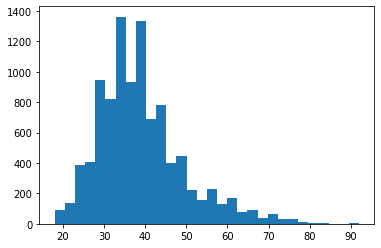

In [ ]:
bank_cstmr['Age'].hist(bins=30, grid=False)

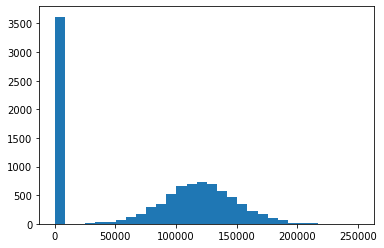

In [ ]:
bank_cstmr['Balance'].hist(bins=30, grid=False)

In [ ]:
bank_cstmr[bank_cstmr['Balance'] == 0]['Exited'].value_counts()

0    3117
1     500
Name: Exited, dtype: int64

Customer yang exited memiliki jumlah maksimum balance sebesar 3117 sedangkan, yang tidak exited sebesar 500

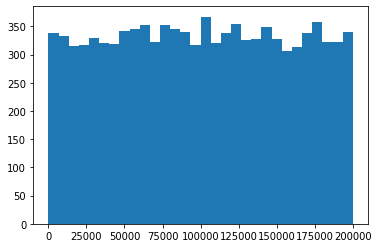

In [ ]:
bank_cstmr['EstimatedSalary'].hist(bins=30, grid=False)

**Membuat pairplot pada num_feature yang melakukan exited**

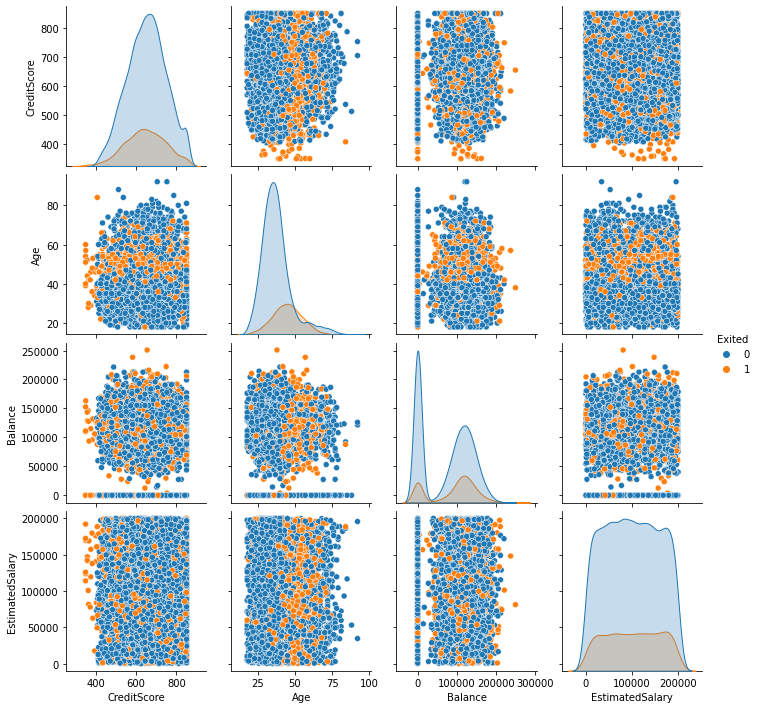

In [ ]:
sns.pairplot(bank_cstmr[num_features + ['Exited']], hue='Exited')

**Hasil Temuan**

Features

1. Berdasarkan output diatas sekitar 81% yang memiliki Credit Score tertinggi tidak melakukan Exited.
2. Sekitar 1/3 customer yang tidak melalukan deposit 86% nya melakukan Exited.

Model

Sebagian data tumpang tindih, metode modelling yang bisa digunakan antara lain metode pengklasifikasi non linier (Decision tree, random forest, KNN, dll)

**Melakukan Pemodelan**

**Membagi data menjadi train dan test untuk validasi**

In [ ]:
from sklearn.model_selection import train_test_split
x = bank_cstmr.drop(['Exited'], axis=1)
y = bank_cstmr['Exited']
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split (x_train_valid, y_train_valid, test_size=0.25, random_state=42)

**Feature Engineering**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
target_names = ['Did not Exit','Exited']
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(x_train, y_train)
pred = dummy_clf.predict(x_train)
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      4769
           1       0.00      0.00      0.00      1231

    accuracy                           0.79      6000
   macro avg       0.40      0.50      0.44      6000
weighted avg       0.63      0.79      0.70      6000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Menstandarisasi kolom num_features menjadi format angka yang sama**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
standar_df = pd.DataFrame(ss.fit_transform(bank_cstmr[num_features]), columns=num_features)
standar_df['Exited'] = bank_cstmr['Exited']

**Mengubah kolom categorical_features menjadi angka yang berurutan**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Geography = LabelEncoder()
le_Gender = LabelEncoder()
le_HasCrCard = LabelEncoder()
le_IsActiveMember = LabelEncoder()
le_NumOfProducts = LabelEncoder()
le_Tenure = LabelEncoder()

le_df = pd.DataFrame()

le_df['Geography'] = le_Geography.fit_transform(bank_cstmr['Geography'])
le_df['Gender'] = le_Gender.fit_transform(bank_cstmr['Gender'])
le_df['HasCrCard'] = le_HasCrCard.fit_transform(bank_cstmr['HasCrCard'])
le_df['IsActiveMember'] = le_IsActiveMember.fit_transform(bank_cstmr['IsActiveMember'])
le_df['NumOfProducts'] = le_NumOfProducts.fit_transform(bank_cstmr['NumOfProducts'])
le_df['Tenure'] = le_Tenure.fit_transform(bank_cstmr['Tenure'])

le_df.head()

,Geography,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,0,0,1,1,0,2
1,2,0,0,1,0,1
2,0,0,1,0,2,8
3,0,0,0,0,1,1
4,2,0,1,1,0,2


**Menggabungkan kolom standar_df dengan le_df**

In [ ]:
model_df = pd.concat([standar_df, le_df], axis=1)
model_df.head()

,CreditScore,Age,Balance,EstimatedSalary,Exited,Geography,Gender,HasCrCard,IsActiveMember,NumOfProducts,Tenure
0,-0.326221,0.293517,-1.225848,0.021886,1,0,0,1,1,0,2
1,-0.440036,0.198164,0.117350,0.216534,0,2,0,0,1,0,1
2,-1.536794,0.293517,1.333053,0.240687,1,0,0,1,0,2,8
3,0.501521,0.007457,-1.225848,-0.108918,0,0,0,0,0,1,1
4,2.063884,0.388871,0.785728,-0.365276,0,2,0,1,1,0,2


**Data sudah dalam bentuk yang diinginkan, selanjutnya mengujinya dengan berbagai model Machine Learning**

In [ ]:
x = model_df.drop(['Exited'], axis=1)
y = model_df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y)

**Menggunakan Model Decision Tree**

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1993
           1       0.73      0.40      0.51       507

    accuracy                           0.85      2500
   macro avg       0.80      0.68      0.71      2500
weighted avg       0.84      0.85      0.83      2500



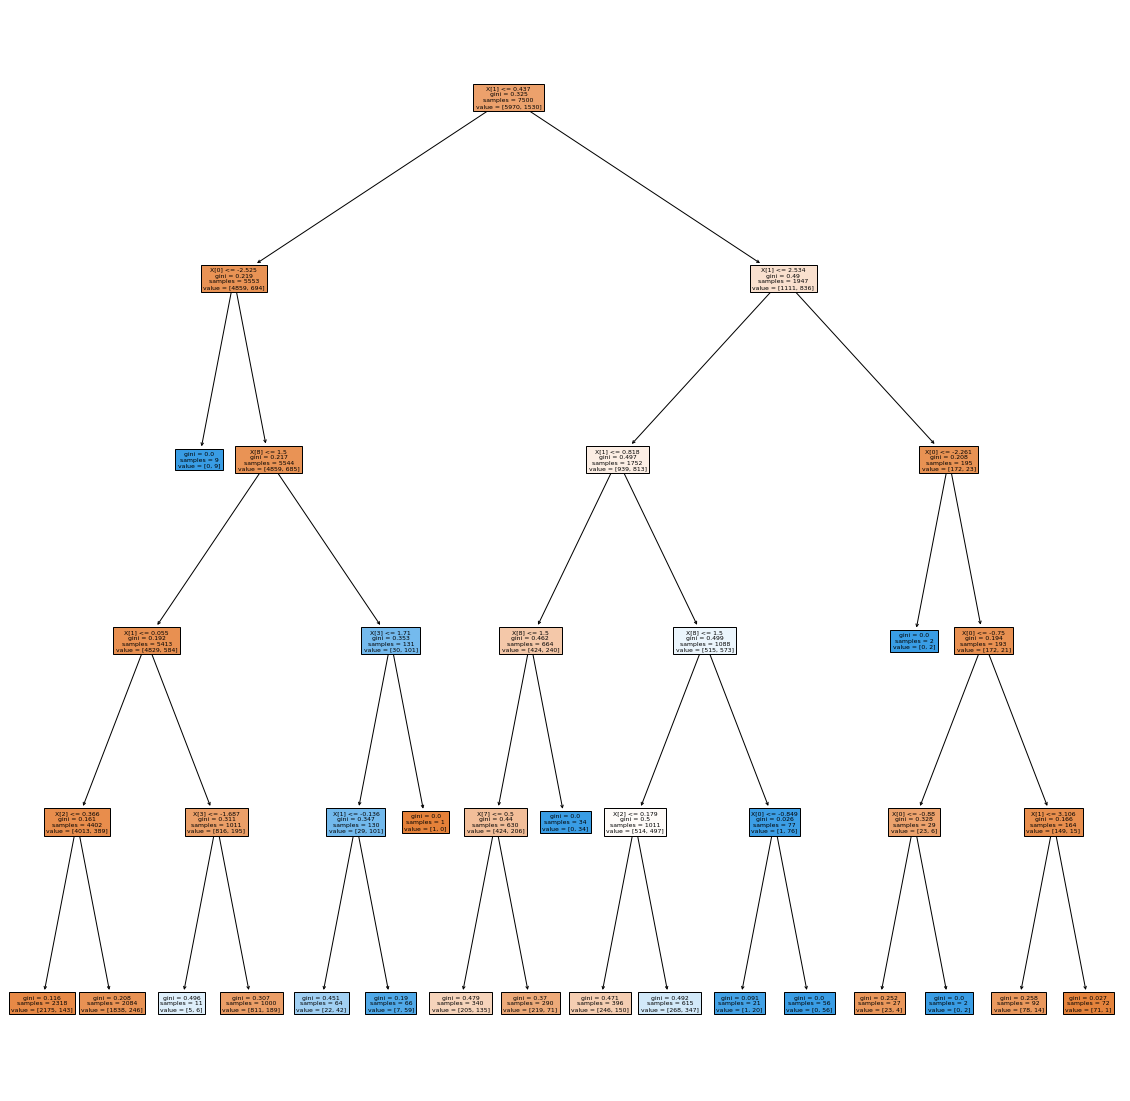

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error

df_clf = DecisionTreeClassifier(max_depth=5, max_features='sqrt')
df_clf.fit(x_train, y_train)
pred = df_clf.predict(x_test)
print(classification_report(y_test, pred))
fig, ax = plt.subplots(figsize=(20,20))
tree.plot_tree(df_clf.fit(x_train, y_train), ax=ax, filled=True)
plt.show()

**Hasil** 

Tingkat akurasi menggunakan model decision tree adalah 85 persen

**Menggunakan Model KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1993
           1       0.58      0.37      0.45       507

    accuracy                           0.82      2500
   macro avg       0.72      0.65      0.67      2500
weighted avg       0.80      0.82      0.80      2500



**Hasil** 

Tingkat akurasi menggunakan model KNN adalah 82 persen

**Menggunakan Model Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1800, min_samples_split=2,
                            min_samples_leaf=1, max_features='auto',
                            max_depth=10, bootstrap=True)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1993
           1       0.78      0.44      0.56       507

    accuracy                           0.86      2500
   macro avg       0.82      0.70      0.74      2500
weighted avg       0.85      0.86      0.85      2500



**Hasil** 

Tingkat akurasi menggunakan model RandomForest adalah 86 persen

**Menggunakan Model AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=1800)
ada_clf.fit(x_train, y_train)
pred = ada_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1973
           1       0.70      0.45      0.55       527

    accuracy                           0.84      2500
   macro avg       0.78      0.70      0.73      2500
weighted avg       0.83      0.84      0.83      2500



**Hasil** 

Tingkat akurasi menggunakan model AdaBoost adalah 84 persen

**Melihat perfomance dengan GaussianProcessClassifier Performance**

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

gpc = GaussianProcessClassifier().fit(x_train, y_train)
gpc.score(x_train, y_train)

0.8924

**Hasil** 

Tingkat perfomance menggunakan model Gaussian Process Classifier adalah 89 persen

**Menggunakan Model GaussionNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_clf = GaussianNB()
GNB_clf.fit(x_train, y_train)
pred = GNB_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1973
           1       0.80      0.24      0.38       527

    accuracy                           0.83      2500
   macro avg       0.82      0.61      0.64      2500
weighted avg       0.82      0.83      0.79      2500



**Hasil** 

Tingkat akurasi menggunakan model GaussianNB adalah 83 persen

**Menggunakan SVC Model**

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(x_train, y_train)
pred = svc_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1973
           1       0.81      0.39      0.52       527

    accuracy                           0.85      2500
   macro avg       0.83      0.68      0.72      2500
weighted avg       0.85      0.85      0.83      2500



**Hasil** 

Tingkat akurasi menggunakan model SVC adalah 85 persen

**Sekarang kita menggunakan model Neural Network, MLPClassifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_clf = MLPClassifier(max_iter=3000).fit(x_train, y_train)
pred = MLP_clf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1973
           1       0.71      0.48      0.58       527

    accuracy                           0.85      2500
   macro avg       0.79      0.72      0.74      2500
weighted avg       0.84      0.85      0.84      2500



**Hasil** 

Tingkat akurasi menggunakan model Neural Network, MLPClassifier adalah 85 persen

**Setelah melihat dengan 8 model yang berbeda dan mengevaluasi hasil outputnya kita dapat menentukan bahwa model RandomForest merupakan model terbaik karena memiliki akurasi sebesar 86 persen**

**MODEL AKHIR**

**Finalisasi model test**

In [ ]:
rf = RandomForestClassifier(n_estimators=1800, min_samples_split=2,
                            min_samples_leaf=1, max_features='auto',
                            max_depth=10, bootstrap=True)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1993
           1       0.78      0.44      0.56       507

    accuracy                           0.86      2500
   macro avg       0.83      0.70      0.74      2500
weighted avg       0.85      0.86      0.84      2500



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

max_features = ['auto','sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'bootstrap' : bootstrap}

clf = RandomizedSearchCV(rf, random_grid)
search = clf.fit(x_train, y_train)
search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)

In [ ]:
rf = RandomForestClassifier(n_estimators=1800, min_samples_split=2,
                            min_samples_leaf=1, max_features='auto',
                            max_depth=10, bootstrap=True)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1600
           1       0.79      0.40      0.53       400

    accuracy                           0.86      2000
   macro avg       0.83      0.68      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[1557,   43],
       [ 242,  158]])

**Hasil**


Berdasarkan evaluasi menggunakan Confusion Matrix diatas dapat disimpulkan bahwa:

0 : (Negatif/Exit)
1 : (Positif/ Tidak Exit)

1. Ada 242 customer yang diprediksi negatif Exit ternyata kenyataannya positif Exit (FN) -> Prediksi salah. Ada 43 yang diprediksi positif Exit ternyata kenyataannya negatif Exit(FP) -> Prediksi salah. 
2. Ada 1557 yang diprediksi positif Exit dan kenyataannya benar positif Exit(TP) -> Prediksi benar. Ada 158 yang diprediksi negatif exit dan kenyataannya benar negatif Exit (TN) -> Prediksi benar


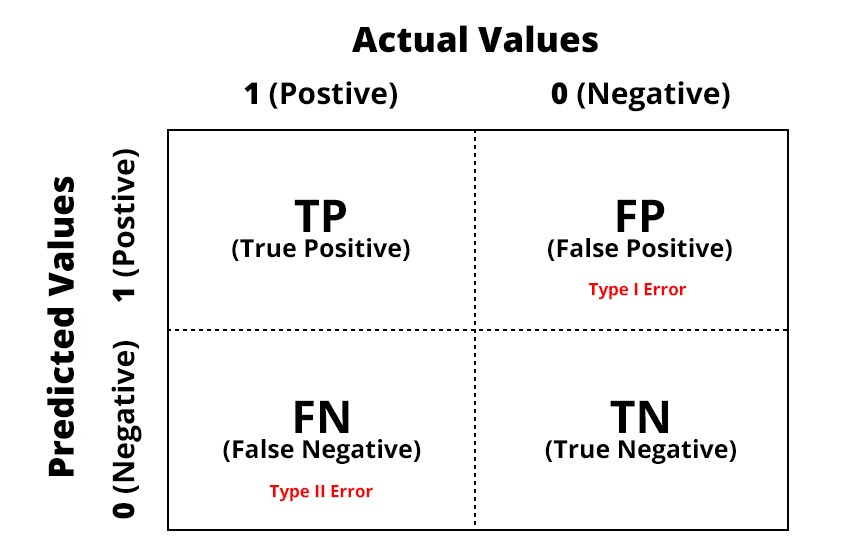